# <center> ANALYSIS OF SHOP CUSTOMERS DATA</center>

# Introductions

<img src = "customer-image.jpeg" width="100%" height="100px" >
Shop Customer data is detailed analysis of a imaginative shop's ideal customers. it helps a business to better understand its customers. The ownwer of a shop gets informations about customers through membership cards.

# About The Dataset

The Dataset was downloaded from www.Kaggle.com
The data is on shop customers. it consists of 2000 records and 8 columns:
 - Customer ID
 - Gender 
 - Age
 - Annual Income
 - Spending Score
 - Profession
 - Work Experience - in Years
 - Family Size

## Questions asked from the data:
1. What is the distributions of customers genders in the dataset?
2. What is the distibutions of customers across different professions?
3. Are there any significant differences in spending scores between different gender groups?
4. How does annnual income vary across different professions with respect to gender?
5. Is there any correletion between age and annual income amongs customers?
6. What is the average family size among customers, and does it vary by professions?
7. Do customers with more work experience tend to have higher spending scores?
8. What is the overall distribution of spending scores among customers?
9. Which professions has the highest spending score among customers?
10. What is the average annual income of male customers compared to female customers?
11. Identify the highest proffession with spending scores of 90 and above?

## Importing Libraries and Loading Dataset

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

In [2]:
customer_data = pd.read_csv("Customers.csv")
customer_data.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


## Cleaning of Data

In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [4]:
print( customer_data.shape)
print('The numbes of rows of the dataset is : '+ str(customer_data.shape[0]))
print('The numbers of columns of the dataset is : '+ str(customer_data.shape[1]))

(2000, 8)
The numbes of rows of the dataset is : 2000
The numbers of columns of the dataset is : 8


In [5]:
customer_data.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [6]:
customer_data.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [7]:
customer_data = customer_data.dropna()
customer_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [8]:
print( customer_data.shape)
print('The numbes of rows of the dataset is now : '+ str(customer_data.shape[0]))
print('The numbers of columns of the dataset is now : '+ str(customer_data.shape[1]))

(1965, 8)
The numbes of rows of the dataset is now : 1965
The numbers of columns of the dataset is now : 8


In [9]:
print(customer_data.Gender.unique())

['Male' 'Female']


In [10]:
print(customer_data.Profession.unique())

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']


## Exploratory Data Analysis

#### Question 1: 
What is the distributions of customers genders in the dataset?

In [11]:
cus_gender = customer_data.Gender.value_counts().reset_index()
cus_gender.columns = ['Gender', 'Count']
print(cus_gender)

   Gender  Count
0  Female   1166
1    Male    799


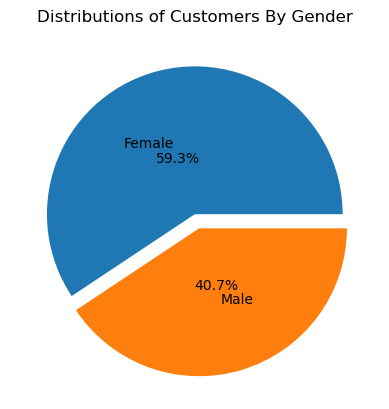

In [12]:
plt.pie( cus_gender['Count'], labels=cus_gender["Gender"], autopct='%1.1f%%', labeldistance= .5,
        pctdistance= .4, explode=(0,0.1))
plt.title("Distributions of Customers By Gender")
plt.show()

#### Question 2: 
What is the distibutions of customers across different professions?

In [13]:
cus_profession = customer_data.Profession.value_counts().reset_index()
cus_profession.columns = ['Profession', 'Count']
print(cus_profession)

      Profession  Count
0         Artist    612
1     Healthcare    339
2  Entertainment    234
3       Engineer    179
4         Doctor    161
5      Executive    153
6         Lawyer    142
7      Marketing     85
8      Homemaker     60


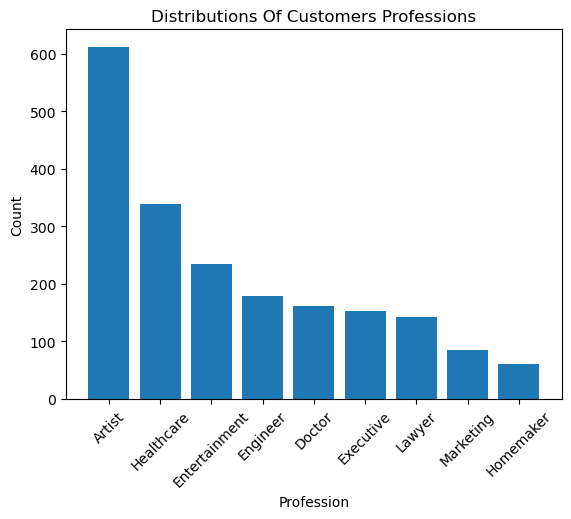

In [14]:
plt.bar(cus_profession['Profession'], cus_profession['Count'])
plt.xticks(rotation=45)
plt.title("Distributions Of Customers Professions")
plt.xlabel("Profession")
plt.ylabel('Count')
plt.show()

#### Question 3: 
 Are there any significant differences in spending scores between different gender group?

In [15]:
gen_cus=customer_data.groupby('Gender')["Spending Score (1-100)"].mean().reset_index()
gen_cus

,Gender,Spending Score (1-100)
0,Female,50.993139
1,Male,51.204005


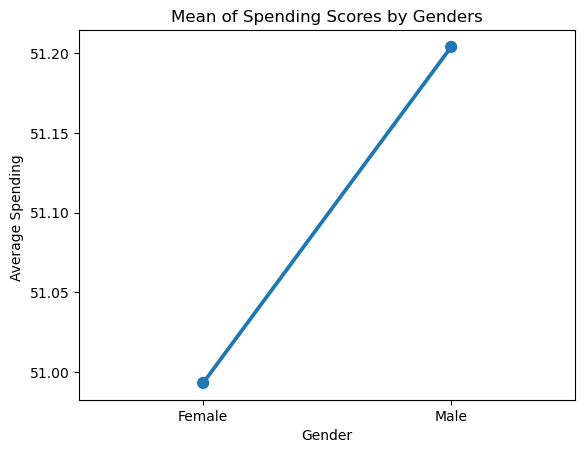

In [16]:
sns.pointplot(data=gen_cus, x="Gender", y="Spending Score (1-100)")
plt.title("Mean of Spending Scores by Genders")
plt.ylabel("Average Spending ")
plt.show()

### Question 4:
How does annnual income vary across different professions with respect to genders?

In [17]:
prof_annual=customer_data.groupby(['Profession','Gender'])['Annual Income ($)'].mean().reset_index()
prof_annual

,Profession,Gender,Annual Income ($)
0,Artist,Female,108102.326316
1,Artist,Male,109880.961207
2,Doctor,Female,109463.168539
3,Doctor,Male,114181.472222
4,Engineer,Female,108497.699029
5,Engineer,Male,114771.039474
6,Entertainment,Female,108907.496241
7,Entertainment,Male,112945.356436
8,Executive,Female,118800.781609
9,Executive,Male,107138.818182


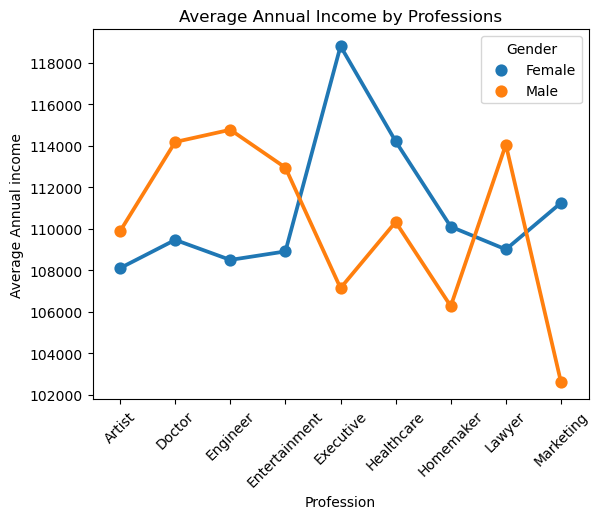

In [18]:
sns.pointplot(data=prof_annual, x= "Profession", y="Annual Income ($)", hue="Gender")
plt.title("Average Annual Income by Professions")
plt.xticks(rotation =45)
plt.ylabel("Average Annual income")
plt.show()

### Question 5:
Is there any correletion between age and annual income amongs customers?

In [19]:
correletion = customer_data['Age'].corr(customer_data['Annual Income ($)'])
print('The correletions between age of the customers and Annual Incomes is : ' + str(correletion)) 

The correletions between age of the customers and Annual Incomes is : 0.021064405276290037


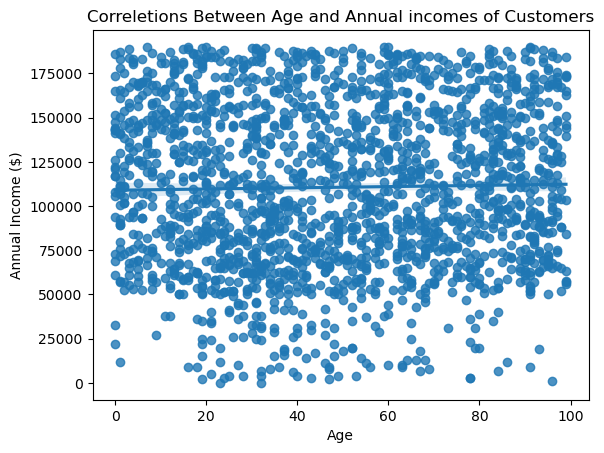

In [20]:
sns.regplot(data=customer_data, x='Age', y='Annual Income ($)')
plt.title('Correletions Between Age and Annual incomes of Customers')
plt.show()

### Question 6
What is the average family size among customers, and does it vary by professions?

In [21]:
prof_family =customer_data.groupby('Profession')['Family Size'].mean().reset_index()
prof_family

,Profession,Family Size
0,Artist,3.653595
1,Doctor,3.670807
2,Engineer,3.581006
3,Entertainment,3.888889
4,Executive,3.967320
5,Healthcare,3.905605
6,Homemaker,4.050000
7,Lawyer,3.619718
8,Marketing,3.729412


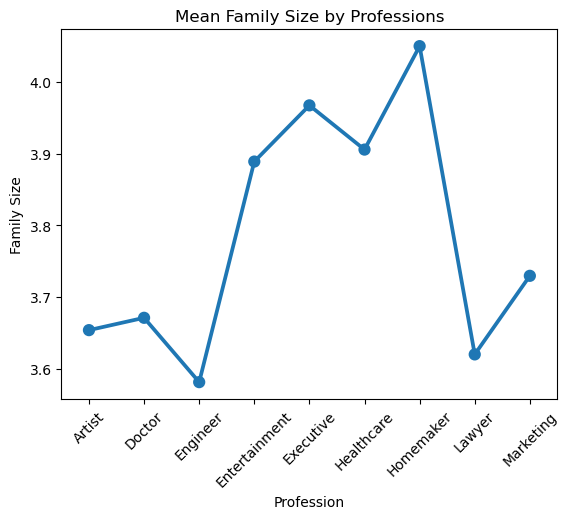

In [22]:
sns.pointplot(data=prof_family, x= "Profession", y="Family Size")
plt.title("Mean Family Size by Professions")
plt.xticks(rotation =45)
plt.show()

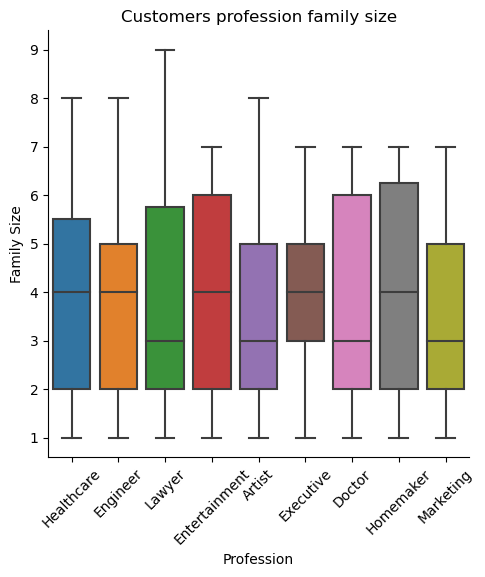

In [23]:
sns.catplot(data= customer_data, x='Profession', y='Family Size', kind='box')
plt.xticks(rotation=45)
plt.title('Customers profession family size')
plt.show()

### Question 7:
Do customers with more work experience tend to have higher spending scores?

In [24]:
correletion_two=customer_data['Work Experience'].corr(customer_data['Spending Score (1-100)'])
print('The correletions between work experience of the customers and spending scores is : ' + str(correletion_two))

The correletions between work experience of the customers and spending scores is : -0.025587078076083597


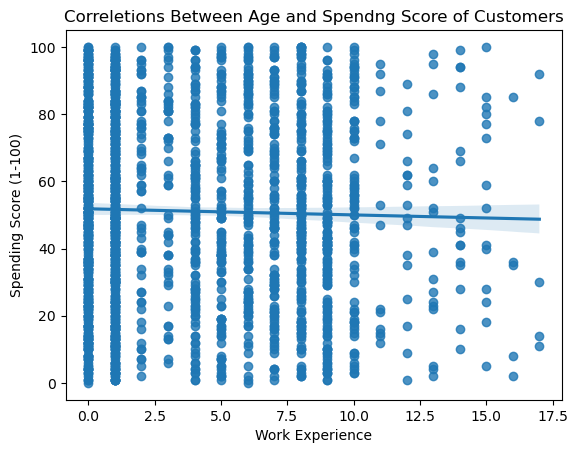

In [25]:
sns.regplot(data=customer_data, x='Work Experience', y='Spending Score (1-100)')
plt.title('Correletions Between Age and Spendng Score of Customers')
plt.show()

### Question 8:
What is the overall distribution of spending scores among customers?

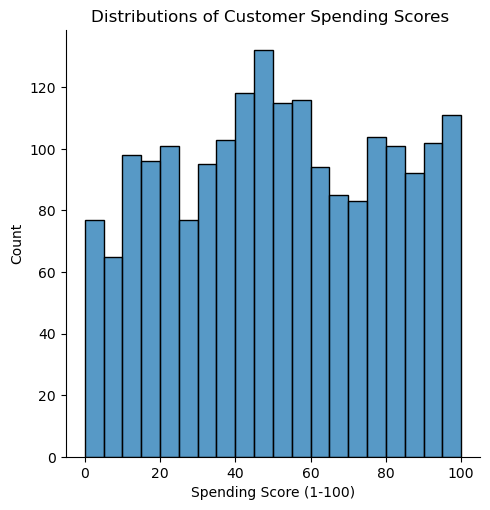

In [26]:
sns.displot(customer_data, x="Spending Score (1-100)", bins=20)
plt.title("Distributions of Customer Spending Scores ")
plt.show()

### Question 9:
Which professions has the highest spending score among customers?


In [27]:
profession_score = customer_data.groupby(["Profession",'Gender'])["Spending Score (1-100)"].mean().reset_index()
profession_score

,Profession,Gender,Spending Score (1-100)
0,Artist,Female,51.860526
1,Artist,Male,54.017241
2,Doctor,Female,51.662921
3,Doctor,Male,52.194444
4,Engineer,Female,50.155340
5,Engineer,Male,47.355263
6,Entertainment,Female,52.015038
7,Entertainment,Male,54.158416
8,Executive,Female,55.793103
9,Executive,Male,42.136364


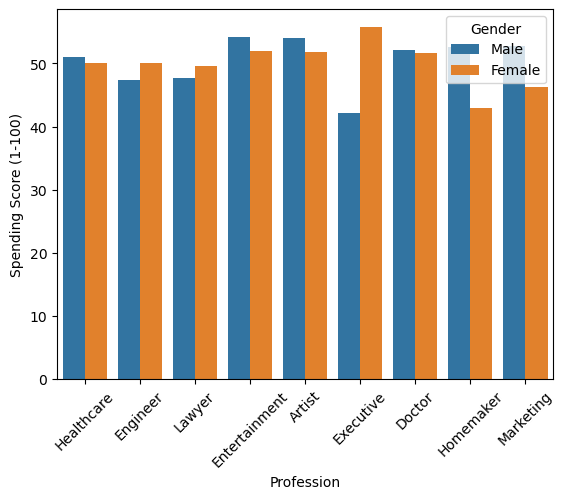

In [28]:
sns.barplot(data=customer_data, x= 'Profession', y='Spending Score (1-100)', hue='Gender', ci=None)
plt.xticks(rotation=45)
plt.show()

### Question 10:
What is the average annual income of male customers compared to female customers?

In [29]:
gender_income = customer_data.groupby('Gender')["Annual Income ($)"].mean().reset_index()
gender_income["Annual Income ($)"] = np.ceil(gender_income["Annual Income ($)"])
gender_income

,Gender,Annual Income ($)
0,Female,110435.0
1,Male,110881.0


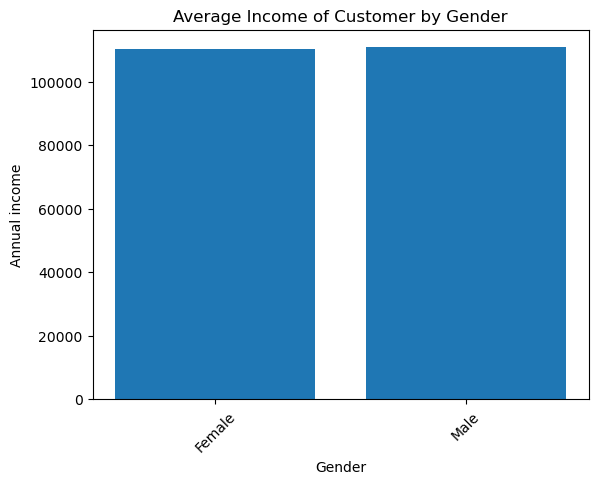

In [30]:
plt.bar(gender_income['Gender'], gender_income['Annual Income ($)'])
plt.xticks(rotation=45)
plt.title("Average Income of Customer by Gender")
plt.xlabel("Gender")
plt.ylabel('Annual income')
plt.show()

### Question 11:
Identify the highest proffession with spending scores of 90 and above?

In [31]:
cus_spen_above_90 =customer_data[customer_data["Spending Score (1-100)"] >= 90]
cus_spen_above_90.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
7,8,Female,23,84000,94,Healthcare,1,3
11,12,Female,35,93000,99,Healthcare,4,4
19,20,Female,35,62000,98,Artist,0,1
33,34,Male,18,62000,92,Homemaker,9,7
41,42,Male,24,85000,92,Healthcare,0,2
123,124,Male,39,6000,91,Healthcare,1,3
127,128,Male,40,4000,95,Artist,0,2
141,142,Male,32,66000,93,Artist,0,5
145,146,Male,28,26000,97,Marketing,8,5
149,150,Male,34,90000,90,Artist,6,3


In [32]:
cus_profession_spen_90 = cus_spen_above_90.Profession.value_counts().reset_index()
cus_profession_spen_90.columns = ['Profession', 'Count']
print(cus_profession_spen_90)

      Profession  Count
0         Artist     84
1     Healthcare     36
2       Engineer     20
3  Entertainment     17
4         Doctor     16
5      Executive     13
6      Marketing     10
7         Lawyer      9
8      Homemaker      8


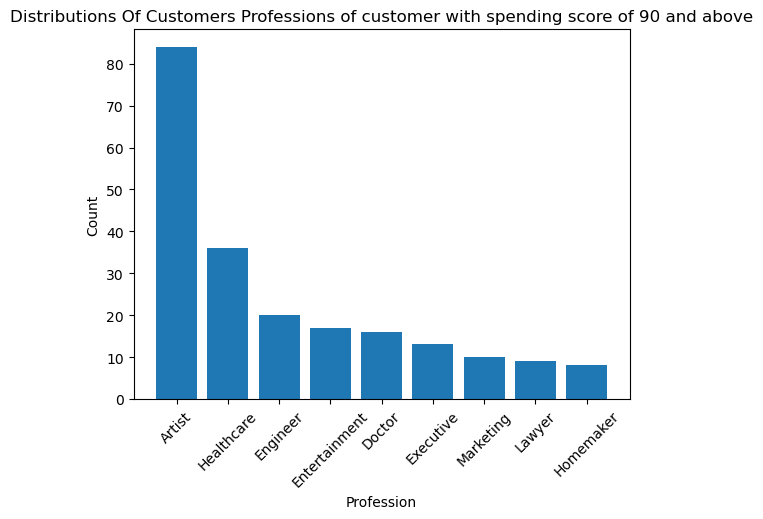

In [33]:
plt.bar(cus_profession_spen_90['Profession'], cus_profession_spen_90['Count'])
plt.xticks(rotation=45)
plt.title("Distributions Of Customers Professions of customer with spending score of 90 and above")
plt.xlabel("Profession")
plt.ylabel('Count')
plt.show()

## Conclusions
The observations made from the data includes:
1. There are 1166 Female Customers and 799 male Customers which is equivalent to 59.3% and 40.95 respectively.
2. The largest Customers group consist of 612 individuals who are artist by profession.
3. There is slightly difference between the average spending scores of male and female Customers.
4. The engineer demonstrates the highest annual income among males, while the executive is marked as the highest annual income among females.
5. There is low positive relationship between customers Age and Annual income with correletion coefficient of 0.02106.
6. The Home maker profession has the largest average family size while the engineeer profession has the least average family size.
7. There is low negative correlations between customers work experience and spending score with correletions coefficient of -0.02895 which implies that customers with more work experience has low work experience.
8. The largest numbers of customers has spending scores between 45 to 50.
9. The female executives has the highest spending scores while the male entertainment has the highest spending scores.
10. The average annual income of male customers is 110,881 and average annual income of female customer is 110,435 which is equivalent to 50.1% and 44.9% respectively.
11. The largest Customers group in dataset of customer with spending scores of 90 and above consist of 84 individuals who are artist by profession.